In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib
# %matplotlib widget

from rover_simulator.world import World
from rover_simulator.rover import BasicRover
from rover_simulator.history import History
from rover_simulator.sensor import ImaginalSensor
from rover_simulator.navigation.localizer import ImaginalLocalizer
from rover_simulator.navigation.controller import ConstantSpeedController
from rover_simulator.navigation.mapper import GridMapper
from rover_simulator.navigation.path_planner.grid_base import Dijkstra, Astar
from rover_simulator.navigation.path_planner.sampling_base import RRT, RRTstar, ChanceConstrainedRRT

In [2]:
world = World(end_step=200)
world.read_objects("../rover_simulator/examples/environment_deadend.txt")

In [3]:
rover_r = 0.5
start_pose = np.array([1.0, 1.0, 0.0])
goal_pos = np.array([13.0, 15.0])

sensor = ImaginalSensor(obstacles=world.obstacles)
mapper = GridMapper(
    grid_size=np.array([20, 20]),
    grid_width=0.5,
    sensor=sensor,
    known_obstacles=world.obstacles,
    rover_r=rover_r
)

# path_planner = Dijkstra(
#     start_pose,
#     goal_pos,
#     mapper.map, 
#     mapper.grid_width
# )

path_planner = Astar(
    start_pose,
    goal_pos,
    mapper.map, 
    mapper.grid_width
)

# path_planner = RRT(
#     start_pose,
#     goal_pos,
#     enlarge_range=rover_r,
#     explore_region=[[0, 20], [0, 20]],
#     known_obstacles=world.obstacles
# )

# path_planner = RRTstar(
#     start_pose,
#     goal_pos,
#     enlarge_range=rover_r,
#     explore_region=[[0, 20], [0, 20]],
#     known_obstacles=world.obstacles
# )

# path_planner = ChanceConstrainedRRT(
#     start_pose[0:2],
#     goal_pos,
#     start_cov=np.diag([1e-10, 1e-10, 1e-10]),
#     enlarge_range=rover_r,
#     explore_region=[[0, 20], [0, 20]],
#     known_obstacles=world.obstacles
# )

path_planner.set_map(mapper)

rover = BasicRover(
    start_pose, rover_r,
    sensor=sensor,
    mapper=mapper,
    path_planner=path_planner,
    localizer=ImaginalLocalizer(),
    controller=ConstantSpeedController(w=np.pi/32),
    history=History()
)

world.append_rover(rover)

In [4]:
rover.waypoints = rover.path_planner.calculate_path()
# rover.waypoints = rover.path_planner.calculate_path(max_iter=500)

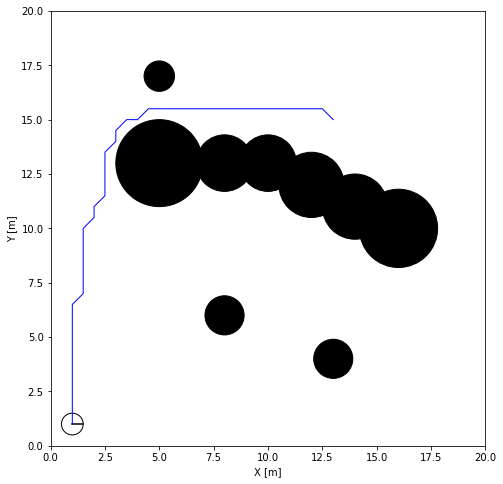

In [5]:
world.plot(xlim=[0, 20], ylim=[0, 20], enlarge_range=rover.r, draw_waypoints=True)

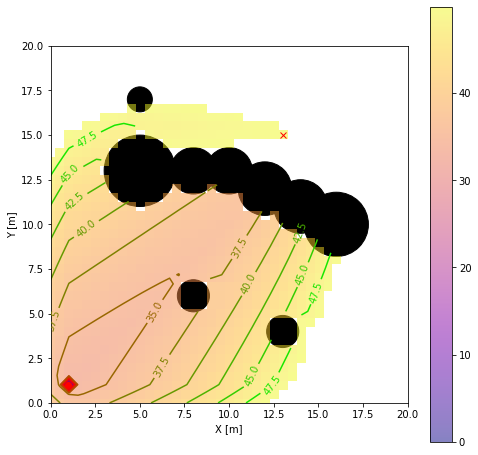

In [6]:
path_planner.draw_map(
    xlim=[0.0, 20.0],
    ylim=[0.0, 20.0],
    obstacles=world.obstacles, enlarge_obstacle=rover.r,
    draw_map=True
)